## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Below are the credentials you can use to connect to the database:


Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoints to the data. You should provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Say, we want to understand the relationship between the expenditures of the governments and the students' overall success in the math and reading.

1. Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.
2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?
3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?
4. What is the correlation between the overall score variable and the 1st principal component? 
5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_feature_engineering_2/feature_engineering_2_pca.ipynb).

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [107]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [108]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [109]:
edu_df.isnull().sum()*100/edu_df.isnull().count()
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [110]:
columnlist= ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

#, 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

#for column in columnlist:
 #   edu_df.loc[:, column ] = edu_df.loc[:,column].fillna(edu_df.loc[:,column].interpolate(method='linear'))
    
states = edu_df['STATE'].unique()    
for state in states:
    edu_df.loc[edu_df['STATE'] == state, columnlist] = edu_df.loc[edu_df['STATE'] == state, columnlist].interpolate()



In [111]:
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          14.142091
TOTAL_REVENUE                   10.790885
FEDERAL_REVENUE                 10.790885
STATE_REVENUE                   10.790885
LOCAL_REVENUE                   10.790885
TOTAL_EXPENDITURE               10.790885
INSTRUCTION_EXPENDITURE         10.790885
SUPPORT_SERVICES_EXPENDITURE    10.790885
OTHER_EXPENDITURE               14.142091
CAPITAL_OUTLAY_EXPENDITURE      10.790885
GRADES_PK_G                      3.284182
GRADES_KG_G                      0.469169
GRADES_4_G                       0.469169
GRADES_8_G                       0.469169
GRADES_12_G                      0.469169
GRADES_1_8_G                     0.469169
GRADES_9_12_G                    0.469169
GRADES_ALL_G                     3.284182
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [112]:
# we drop the null values after interpolation
edu_df.dropna(inplace=True)

In [113]:
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [114]:
edu_df.describe()


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


## 1. Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.

In [117]:
edu_df['weightedscore'] = (edu_df["GRADES_4_G"] * ((edu_df["AVG_READING_4_SCORE"]*0.5)+(edu_df["AVG_MATH_4_SCORE"]*0.5)) + edu_df["GRADES_8_G"] * (edu_df["AVG_READING_8_SCORE"]*0.5)+(edu_df["AVG_MATH_8_SCORE"]*0.5))/(edu_df["GRADES_4_G"]+edu_df["GRADES_8_G"])


edu_df['weightedscore'].describe()

count    466.000000
mean     179.848363
std        4.248346
min      160.543071
25%      177.445282
50%      180.247623
75%      182.784615
max      189.779533
Name: weightedscore, dtype: float64

## 2.What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

(array([55., 50., 39., 30., 33., 35., 23., 26., 34., 24., 11.,  6.,  9.,
         8.,  5.,  7.,  6.,  4.,  6.,  7.,  2.,  3.,  2.,  2.,  3.,  3.,
         2.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
         1.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([   15452.  ,   117534.05,   219616.1 ,   321698.15,   423780.2 ,
          525862.25,   627944.3 ,   730026.35,   832108.4 ,   934190.45,
         1036272.5 ,  1138354.55,  1240436.6 ,  1342518.65,  1444600.7 ,
         1546682.75,  1648764.8 ,  1750846.85,  1852928.9 ,  1955010.95,
         2057093.  ,  2159175.05,  2261257.1 ,  2363339.15,  2465421.2 ,
         2567503.25,  2669585.3 ,  2771667.35,  2873749.4 ,  2975831.

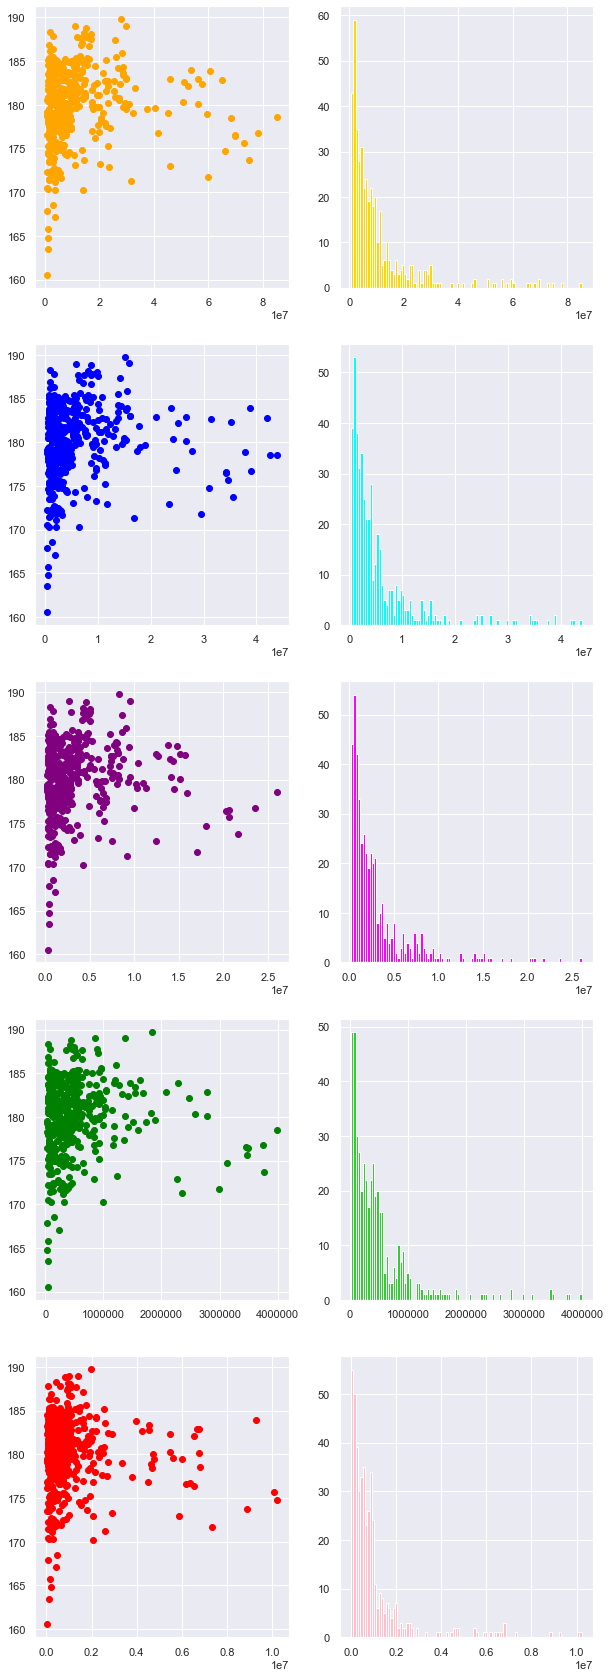

In [126]:
#edu_df['weightedscore'],hue=('TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
 #     'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
  #     'CAPITAL_OUTLAY_EXPENDITURE'),height=9)
#edu_df['weightedscore']

sns.set_style("darkgrid")
plt.figure(figsize=(10,30))

plt.subplot(5,2,1)
plt.scatter( edu_df['TOTAL_EXPENDITURE'],edu_df['weightedscore'], color='orange')
plt.subplot(5,2,2)
plt.hist( edu_df['TOTAL_EXPENDITURE'],bins=100, color='gold')

plt.subplot(5,2,3)
plt.scatter( edu_df['INSTRUCTION_EXPENDITURE'],edu_df['weightedscore'], color='blue')
plt.subplot(5,2,4)
plt.hist( edu_df['INSTRUCTION_EXPENDITURE'],bins=100, color='cyan')

plt.subplot(5,2,5)
plt.scatter( edu_df['SUPPORT_SERVICES_EXPENDITURE'],edu_df['weightedscore'], color='purple')
plt.subplot(5,2,6)
plt.hist( edu_df['SUPPORT_SERVICES_EXPENDITURE'],bins=100, color='magenta')

plt.subplot(5,2,7)
plt.scatter( edu_df['OTHER_EXPENDITURE'],edu_df['weightedscore'], color='green')
plt.subplot(5,2,8)
plt.hist( edu_df['OTHER_EXPENDITURE'],bins=100, color='limegreen')

plt.subplot(5,2,9)
plt.scatter( edu_df['CAPITAL_OUTLAY_EXPENDITURE'],edu_df['weightedscore'], color='red')
plt.subplot(5,2,10)
plt.hist( edu_df['CAPITAL_OUTLAY_EXPENDITURE'],bins=100, color='pink')



In [121]:
edu_df[['weightedscore','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
      'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE']].corr() 

,weightedscore,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
weightedscore,1.000000,0.074788,0.088790,0.079757,0.027671,0.002129
TOTAL_EXPENDITURE,0.074788,1.000000,0.990255,0.992988,0.943702,0.925784
INSTRUCTION_EXPENDITURE,0.088790,0.990255,1.000000,0.974399,0.902173,0.884798
SUPPORT_SERVICES_EXPENDITURE,0.079757,0.992988,0.974399,1.000000,0.952282,0.911245
OTHER_EXPENDITURE,0.027671,0.943702,0.902173,0.952282,1.000000,0.918188
CAPITAL_OUTLAY_EXPENDITURE,0.002129,0.925784,0.884798,0.911245,0.918188,1.000000


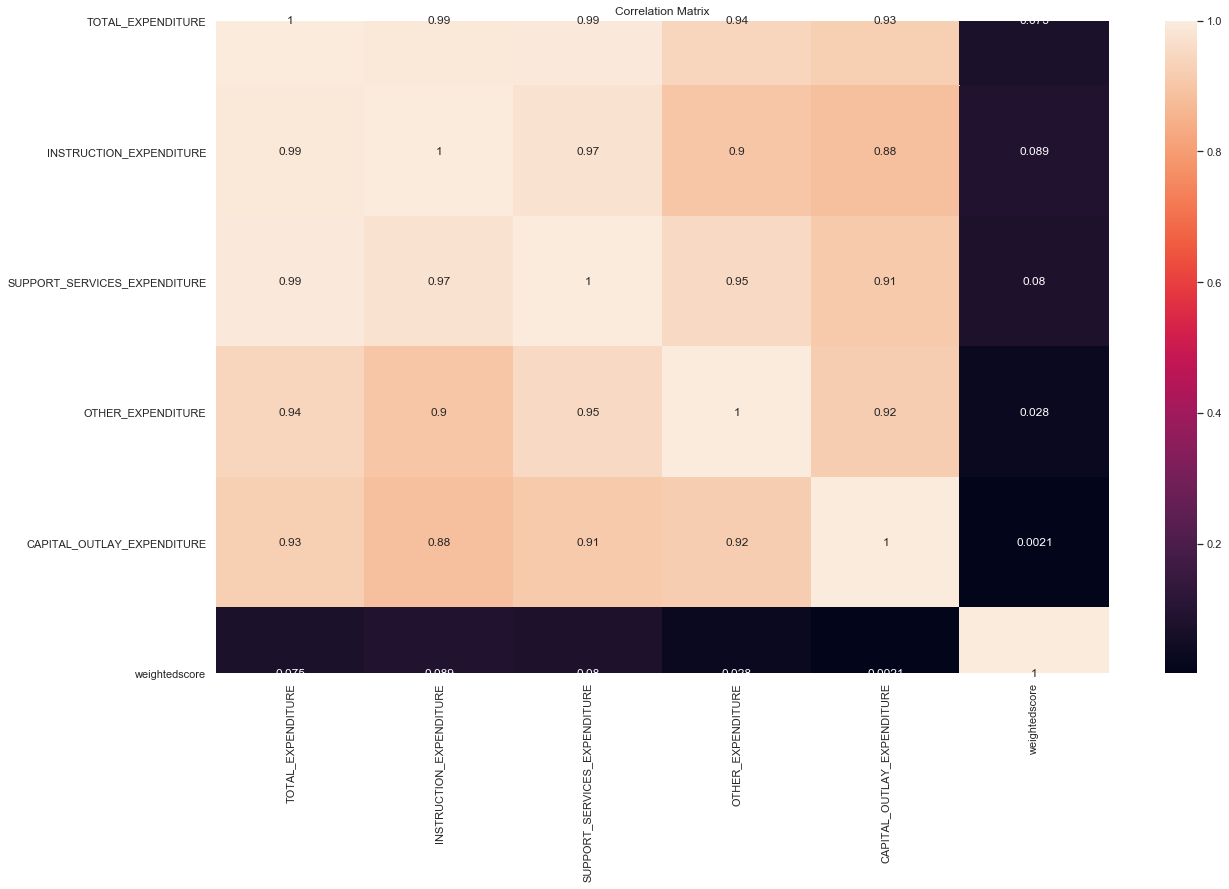

In [123]:



plt.figure(figsize=(20,12))
heat_corr=edu_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
      'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE','weightedscore']].corr() 
sns.heatmap(heat_corr, annot=True) 
plt.title("Correlation Matrix")
plt.show()


Other Expenditure appears to be the most highly correlated

## 3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [ ]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [129]:
### my version 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = edu_df[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 
            'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]
#TOTAL_EXPENDITURE removed
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components = 1)
edu_df['pca_1'] = sklearn_pca.fit_transform(X)
print('ther percentage of total variance in the dataset explained by each'
      'component from Sklearn PCA.\n',
     sklearn_pca.explained_variance_ratio_)

ther percentage of total variance in the dataset explained by eachcomponent from Sklearn PCA.
 [0.9430175]


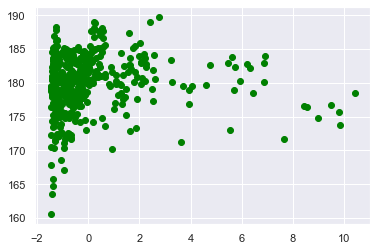

In [132]:
plt.scatter( edu_df['pca_1'],edu_df['weightedscore'], color='green')


## 4.What is the correlation between the overall score variable and the 1st principal component?

,pca_1,weightedscore
pca_1,1.000000,0.051362
weightedscore,0.051362,1.000000


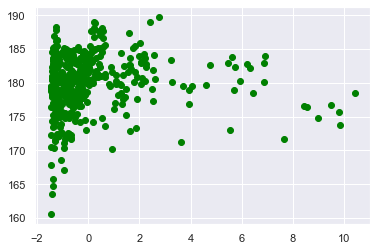

In [134]:
plt.scatter( edu_df['pca_1'],edu_df['weightedscore'], color='green')
edu_df[['pca_1','weightedscore']].corr()

## 5.If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

In [135]:
edu_df[['weightedscore','pca_1','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
      'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE','weightedscore']].corr()

,weightedscore,pca_1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,weightedscore
weightedscore,1.000000,0.051362,0.074788,0.088790,0.079757,0.027671,0.002129,1.000000
pca_1,0.051362,1.000000,0.992054,0.968606,0.988345,0.971343,0.955792,0.051362
TOTAL_EXPENDITURE,0.074788,0.992054,1.000000,0.990255,0.992988,0.943702,0.925784,0.074788
INSTRUCTION_EXPENDITURE,0.088790,0.968606,0.990255,1.000000,0.974399,0.902173,0.884798,0.088790
SUPPORT_SERVICES_EXPENDITURE,0.079757,0.988345,0.992988,0.974399,1.000000,0.952282,0.911245,0.079757
OTHER_EXPENDITURE,0.027671,0.971343,0.943702,0.902173,0.952282,1.000000,0.918188,0.027671
CAPITAL_OUTLAY_EXPENDITURE,0.002129,0.955792,0.925784,0.884798,0.911245,0.918188,1.000000,0.002129
weightedscore,1.000000,0.051362,0.074788,0.088790,0.079757,0.027671,0.002129,1.000000


I probably wouldn't use the first principle component because nearly all of the other expenditure types show higher coorelation with the exception of other and capital outlay expenditure. 